In [1]:
%load_ext autoreload
%autoreload 2

# HDBSCAN Images

In [2]:
from pathlib import Path

import numpy as np
import pandas as pd
from hdbscan import HDBSCAN

In [3]:
import matplotlib.pyplot as plt

plt.style.use("seaborn-notebook")

SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 25

plt.rc("font", size=SMALL_SIZE)
plt.rc("axes", titlesize=SMALL_SIZE)
plt.rc("axes", labelsize=MEDIUM_SIZE)
plt.rc("xtick", labelsize=SMALL_SIZE)
plt.rc("ytick", labelsize=SMALL_SIZE)
plt.rc("legend", fontsize=SMALL_SIZE)
plt.rc("figure", titlesize=BIGGER_SIZE)

In [4]:
pd.set_option("plotting.backend", "matplotlib")

In [5]:
import sklearn.datasets as data

In [6]:
DATA_PATH = Path("../thesis/img/")

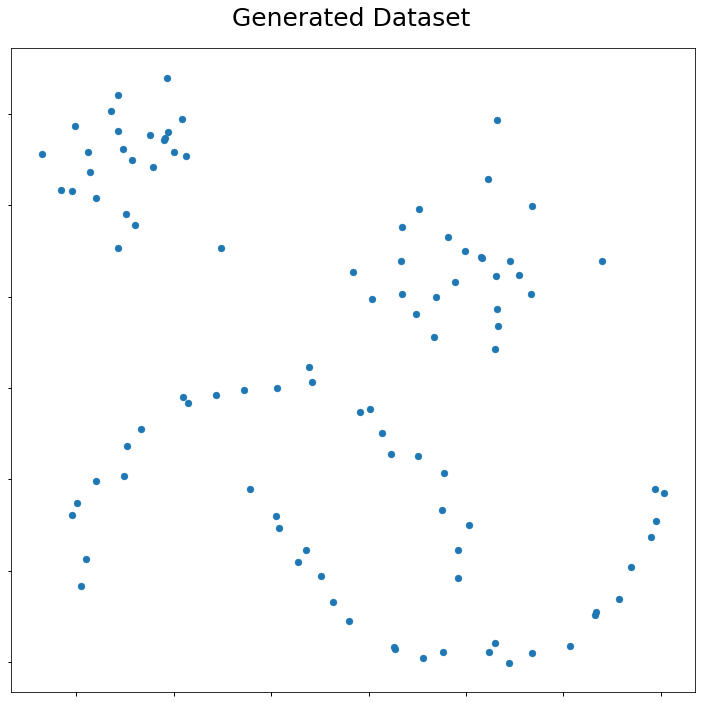

In [7]:
np.random.seed(42)

fig, ax = plt.subplots(figsize=(10, 10))

dataset = np.vstack(
    [
        data.make_moons(n_samples=50, noise=0.05)[0],
        data.make_blobs(
            n_samples=50, centers=[(-0.75, 2.25), (1, 1.7)], cluster_std=0.25
        )[0],
    ]
)

plt.scatter(*dataset.T)
fig.suptitle("Generated Dataset")

ax.set_xticklabels([])
ax.set_yticklabels([])

plt.tight_layout()

plt.savefig(DATA_PATH / "hdbscan_dataset.svg")
plt.show()

In [8]:
hscan = HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)

In [9]:
hscan.fit(dataset)

HDBSCAN(gen_min_span_tree=True)

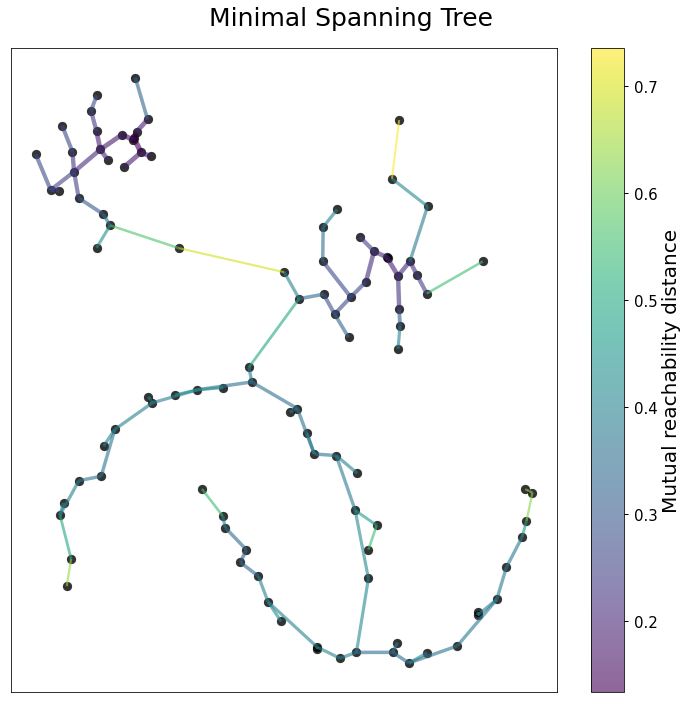

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))


hscan.minimum_spanning_tree_.plot(
    edge_cmap="viridis", edge_alpha=0.6, node_size=80, edge_linewidth=2, axis=ax
)

fig.suptitle("Minimal Spanning Tree")

ax.set_xticklabels([])
ax.set_yticklabels([])

plt.tight_layout()

plt.savefig(DATA_PATH / "hdbscan_tree.svg")
plt.show()

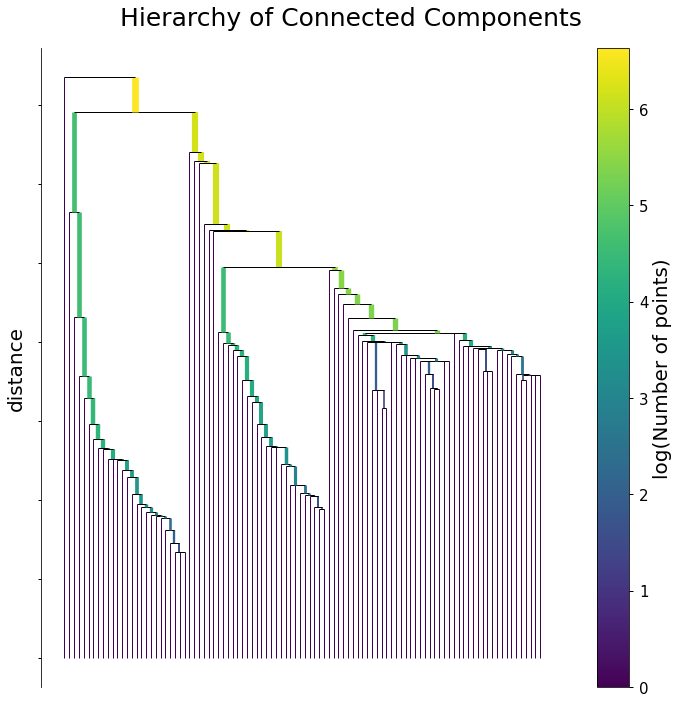

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))

hscan.single_linkage_tree_.plot(cmap="viridis", colorbar=True)

fig.suptitle("Hierarchy of Connected Components")

ax.set_xticklabels([])
ax.set_yticklabels([])

plt.tight_layout()

plt.savefig(DATA_PATH / "hdbscan_hier.svg")
plt.show()

<AxesSubplot:ylabel='distance'>

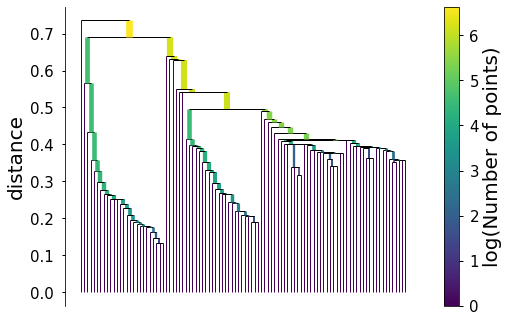

In [12]:
hscan.single_linkage_tree_.plot(cmap="viridis", colorbar=True)

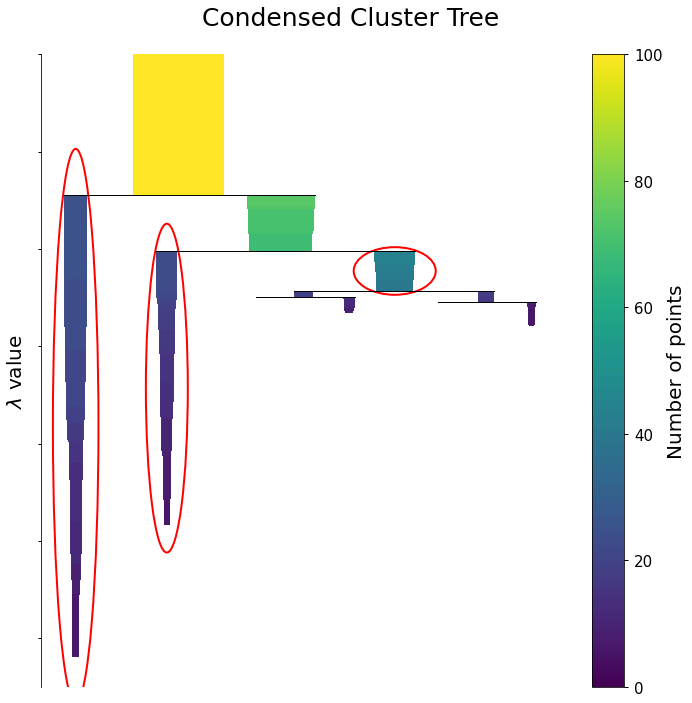

In [13]:
fig, ax = plt.subplots(figsize=(10, 10))

hscan.condensed_tree_.plot(select_clusters=True)

fig.suptitle("Condensed Cluster Tree")

ax.set_xticklabels([])
ax.set_yticklabels([])

plt.tight_layout()

plt.savefig(DATA_PATH / "hdbscan_cons.svg")
plt.show()